# New Notebook with updated Data. 

In [2]:
#!pip install -U imbalanced-learn


In [3]:
# Standard Stuff 
import pandas as pd
import numpy as np 

# Modeling Stuff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Notes to Myself / To-Do List

* I probabaly want to do a rolling mean of 7. It mosquitos don't appear because it happens to be warm out one day, it's a build up. 

# Important Mosquito Information
---

## Mosquito Breeding 
Weather is a major motivator for what mosquitoes do, and when. 

Mosquitoes are cold-blooded insects. This means that their body temperature is more or less the same as their environment, since they don't have the ability to regulate their internal temperatures. 

Considering how driven by temperature mosquitoes are, it's no wonder weather plays such a make-or-break role in mosquito activity.

**Rainfall == Mosquito Breeding**

## Mosquito Activity
Mosquitoes are active once temperatures are consistently above 50 degrees, but activity tends to jump when it's 78 degrees and up.

Different species are active at different times, but in general, most mosquitoes are extra active at dusk and dawn. Warm evening temperatures allow mosquitoes to thrive, since prolonged sun exposure can actually dehydrate them.

Warm weather also means a greater chance of infection. Research has shown that for mosquitoes carrying West Nile virus, the virus can be amplified in warmer weather. Same goes for Zika mosquitoes; the warmer it gets, the more efficiently they transmit the virus.

That's because warmer air incubates viruses faster in mosquitoes, which gives them more time to spread them. Combine that with the fact that warmer temperatures make them hungrier for blood meals, and you've got a recipe for a potential outbreak.

It can, however, get too hot and dry for mosquitoes. In some areas that are too hot, mosquitoes will be less active.

[source](https://blog.mosquito.buzz/how-weather-affects-mosquito-activity)

# Import the Data

In [4]:
df = pd.read_csv('./updated_train_and_weather.csv')

In [5]:
df.head()

,Date,Species,Block,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Coordinates,Tmax_station1,...,Cool_station2,Sunrise_station2,Sunset_station2,SnowFall_station2,PrecipTotal_station2,StnPressure_station2,SeaLevel_station2,ResultSpeed_station2,ResultDir_station2,AvgSpeed_station2
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,1,0,POINT (-87.800991 41.95469),88,...,12,421.0,1917.0,0.0,0.0,29.44,30.09,5.8,16,7.4
1,2007-05-29,CULEX RESTUANS,41,T002,41.954690,-87.800991,1,0,POINT (-87.800991 41.95469),88,...,12,421.0,1917.0,0.0,0.0,29.44,30.09,5.8,16,7.4
2,2007-05-29,CULEX RESTUANS,62,T007,41.994991,-87.769279,1,0,POINT (-87.769279 41.994991),88,...,12,421.0,1917.0,0.0,0.0,29.44,30.09,5.8,16,7.4
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,1,0,POINT (-87.82481199999999 41.974089),88,...,12,421.0,1917.0,0.0,0.0,29.44,30.09,5.8,16,7.4
4,2007-05-29,CULEX RESTUANS,79,T015,41.974089,-87.824812,4,0,POINT (-87.82481199999999 41.974089),88,...,12,421.0,1917.0,0.0,0.0,29.44,30.09,5.8,16,7.4


## Data Cleaning and Feature Engineering

In [6]:
# Made a humidity feature
df['humidity_station1'] = 100*(np.exp((17.625*df['DewPoint_station1'])/(243.04+df['DewPoint_station1']))/np.exp((17.625*df['Tavg_station1'])/(243.04+df['Tavg_station1']))) 
df['humidity_station2'] = 100*(np.exp((17.625*df['DewPoint_station2'])/(243.04+df['DewPoint_station2']))/np.exp((17.625*df['Tavg_station2'])/(243.04+df['Tavg_station2']))) 

In [7]:
df.drop(labels=['Sunset_station1', 'SnowFall_station1', 'StnPressure_station1', 'SeaLevel_station1', 'ResultSpeed_station1', 'ResultDir_station1', 'AvgSpeed_station1'], axis=1, inplace=True)

In [8]:
df.drop(labels=['Tmax_station2', 'Tmin_station2', 'Tavg_station2', 'Depart_station2', 'DewPoint_station2', 'WetBulb_station2', 'Heat_station2','Cool_station2', 'Sunrise_station2', 'Sunset_station2','SnowFall_station2', 'PrecipTotal_station2', 'StnPressure_station2', 'SeaLevel_station2', 'ResultSpeed_station2', 'ResultDir_station2', 'AvgSpeed_station2', 'humidity_station2'], axis=1, inplace=True)

In [9]:
df.head(2)

,Date,Species,Block,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Coordinates,Tmax_station1,Tmin_station1,Tavg_station1,Depart_station1,DewPoint_station1,WetBulb_station1,Heat_station1,Cool_station1,Sunrise_station1,PrecipTotal_station1,humidity_station1
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,T002,41.95469,-87.800991,1,0,POINT (-87.800991 41.95469),88,60,74,10,58,65,0,9,421.0,0.0,48.7675
1,2007-05-29,CULEX RESTUANS,41,T002,41.95469,-87.800991,1,0,POINT (-87.800991 41.95469),88,60,74,10,58,65,0,9,421.0,0.0,48.7675


### Important thing to Note:
The `CULEX PIPIENS/RESTUANS`, `CULEX PIPIENS` and `CULEX RESTUANS` are the only species that carry WNV.

### We want to find what traps are most probabale of have WNV

In [10]:
# Inter changing NumMosquitos and and WNV presence will be important 
prominent_traps = df.groupby('Trap')['NumMosquitos'].mean().sort_values(ascending=False)
prom_traps_wnv  = df.groupby('Trap')['WnvPresent'].mean().sort_values(ascending=False)


mosq_density_by_traps = pd.DataFrame(prominent_traps)
wnv_density_by_traps  = pd.DataFrame(prom_traps_wnv)



# Merge these dataFrames on index - Maybe create an interaction term that trap importance.  
trap_df = mosq_density_by_traps.join(wnv_density_by_traps)
trap_df.head()
trap_df.reset_index(inplace=True)
trap_df['trap_power'] = trap_df['NumMosquitos'] * trap_df['WnvPresent']
trap_df.drop(columns='trap_power', inplace=True)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

trap_df[['NumMosquitos', 'WnvPresent']] = ss.fit_transform(trap_df[['NumMosquitos', 'WnvPresent']])
trap_df['trap_power'] = trap_df['NumMosquitos'] * trap_df['WnvPresent']
trap_df.head()

,Trap,NumMosquitos,WnvPresent,trap_power
0,T115,4.940479,0.782486,3.865856
1,T103,4.321231,0.701924,3.033176
2,T138,3.643009,0.189891,0.691776
3,T128,1.942341,0.616980,1.198386
4,T900,1.910571,1.079001,2.061508


In [11]:
trap_df = trap_df.sort_values(by='trap_power', ascending=False).reset_index()

In [12]:
trap_df.head()

,index,Trap,NumMosquitos,WnvPresent,trap_power
0,0,T115,4.940479,0.782486,3.865856
1,1,T103,4.321231,0.701924,3.033176
2,6,T225,1.760926,1.530128,2.694442
3,17,T233,1.076989,2.327057,2.506215
4,5,T002,1.838865,1.302146,2.394471


In [13]:
# Aye let's get it 


for trap in trap_df['Trap']:
    print(df[df['Trap'] == trap]['Latitude'].value_counts())
    

41.673408    542
Name: Latitude, dtype: int64
41.702724    83
Name: Latitude, dtype: int64
41.743402    103
Name: Latitude, dtype: int64
42.009876    50
Name: Latitude, dtype: int64
41.95469    185
Name: Latitude, dtype: int64
41.974689    750
Name: Latitude, dtype: int64
41.925652    9
Name: Latitude, dtype: int64
41.973845    87
Name: Latitude, dtype: int64
41.970248    30
Name: Latitude, dtype: int64
41.992478    80
41.981964    31
Name: Latitude, dtype: int64
41.688324    86
Name: Latitude, dtype: int64
41.704572    160
Name: Latitude, dtype: int64
42.008314    139
Name: Latitude, dtype: int64
41.994469    14
Name: Latitude, dtype: int64
41.74785    13
Name: Latitude, dtype: int64
42.011601    66
Name: Latitude, dtype: int64
41.823065    15
Name: Latitude, dtype: int64
41.953705    15
Name: Latitude, dtype: int64
41.961743    22
Name: Latitude, dtype: int64
42.010412    63
Name: Latitude, dtype: int64
41.775051    8
Name: Latitude, dtype: int64
41.846283    15
Name: Latitude, dtype

# Dummy Species 

In [14]:
df = pd.get_dummies(df, columns=['Species'])

In [15]:
df.columns

Index(['Date', 'Block', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Coordinates', 'Tmax_station1', 'Tmin_station1',
       'Tavg_station1', 'Depart_station1', 'DewPoint_station1',
       'WetBulb_station1', 'Heat_station1', 'Cool_station1',
       'Sunrise_station1', 'PrecipTotal_station1', 'humidity_station1',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS'],
      dtype='object')

# Dropping Features
* I am dropping all of Station 2, I do not understand their relevance here. 
* Dropping things like sunrise, sunset, snowfall. They seem useless

In [16]:
features_to_drop = [
                    
       'Tmax_station2', 'Tmin_station2', 'Tavg_station2', 'Depart_station2',
       'DewPoint_station2', 'WetBulb_station2', 'Heat_station2',
       'Cool_station2', 'Sunrise_station2', 'Sunset_station2',
       'SnowFall_station2', 'PrecipTotal_station2', 'StnPressure_station2',
       'SeaLevel_station2', 'ResultSpeed_station2', 'ResultDir_station2',
       'AvgSpeed_station2', 'humidity_station2']

In [17]:
#df.drop(features_to_drop, axis=1, inplace=True)

In [18]:
df.drop(labels=['Sunset_station1', 'SnowFall_station1', 'StnPressure_station1', 'SeaLevel_station1', 'ResultSpeed_station1', 'ResultDir_station1', 'AvgSpeed_station1'], axis=1, inplace=True)

KeyError: "labels ['Sunset_station1' 'SnowFall_station1' 'StnPressure_station1'\n 'SeaLevel_station1' 'ResultSpeed_station1' 'ResultDir_station1'\n 'AvgSpeed_station1'] not contained in axis"

In [ ]:
df.drop(labels=['Tmax_station2', 'Tmin_station2', 'Tavg_station2', 'Depart_station2', 'DewPoint_station2', 'WetBulb_station2', 'Heat_station2','Cool_station2', 'Sunrise_station2', 'Sunset_station2','SnowFall_station2', 'PrecipTotal_station2', 'StnPressure_station2', 'SeaLevel_station2', 'ResultSpeed_station2', 'ResultDir_station2', 'AvgSpeed_station2', 'humidity_station2'], axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
#df.drop(labels=['Trap', 'Block', 'Tmax_station1', 'Tmin_station1', 'Depart_station1', 'Heat_station1', 'Cool_station1'], axis=1, inplace=True)

In [ ]:
df.drop(labels='Coordinates', axis=1, inplace=True)

In [ ]:
df.dtypes

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.corr()[['WnvPresent']], cmap='Blues', linewidths=.5, ax=ax)

In [ ]:
df.WnvPresent.value_counts()

# The Classes are Imbalanced - Sample with Replacement

In [ ]:
# def bootstrap(data, size = 9000):
#     stat_list = []
#     for i in range(size):
#         statistic = (np.random.choice(data, size = len(data), replace = True))
#         stat_list.append(statistic)
#     return stat_list

# bootstrap(df_vpresent)


In [ ]:
#df_vpresent = df[df['WnvPresent'] == 1]
# df.iloc[np.random.choice(df, size=9000, replace=True), 'WnvPresent']


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index(df['Date'], inplace=True)
df.head()

In [ ]:
df.drop(labels=['Trap', 'Block', 'Date'], axis=1, inplace=True)

In [ ]:
#df['Date'] = df.index
df['month'] = df.Date.dt.month
df.head()
df.drop(labels='Date', axis=1, inplace=True)
df.head()

In [ ]:
#df  pd.get_dummies(df, columns=['month'])

df.head()

**I should not over sample my test**

In [ ]:
new_df['WnvPresent'].value_counts()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df.drop('WnvPresent', axis=1)
y = df['WnvPresent']

ros = RandomOverSampler()

X_resampled, y_resampled = ros.fit_sample(X, y)



Xi = pd.DataFrame(X_resampled)
yi = pd.DataFrame(y_resampled)


#new_df = pd.concat([Xi, yi])


In [ ]:
yi.rename(columns={0: 'WnvPresent'}, inplace=True)

In [ ]:
rename_columns = []
for col in X.columns:
    rename_columns.append(col)

In [ ]:
rename_columns

In [ ]:
new_df = pd.concat([Xi, yi], axis=1)
new_df.columns = ['Latitude',
 'Longitude',
 'NumMosquitos',
 'Tmax_station1',
 'Tmin_station1',
 'Tavg_station1',
 'Depart_station1',
 'DewPoint_station1',
 'WetBulb_station1',
 'Heat_station1',
 'Cool_station1',
 'Sunrise_station1',
 'PrecipTotal_station1',
 'humidity_station1',
 'Species_CULEX ERRATICUS',
 'Species_CULEX PIPIENS',
 'Species_CULEX PIPIENS/RESTUANS',
 'Species_CULEX RESTUANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Species_CULEX TERRITANS',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October', 'WnvPresent']

In [ ]:
new_df.head()

In [ ]:
new_df.to_csv('Modeling_df_3.csv', index=False)

In [ ]:
X = new_df.drop('WnvPresent', axis=1)
y = new_df['WnvPresent']

ros = RandomOverSampler()

X_resampled, y_resampled = ros.fit_sample(X, y)



Xi = pd.DataFrame(X_resampled)
yi = pd.DataFrame(y_resampled)

# Map of Mosquito Density / Trap Location
---
[source](https://www.kaggle.com/vascovv/west-nile-heatmap/code)

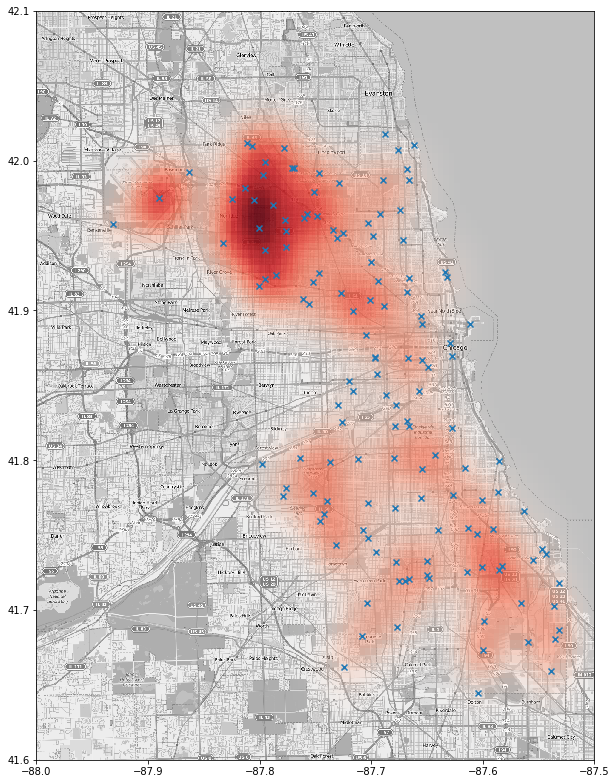

In [19]:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt('./mapdata_copyright_openstreetmap_contributors.txt')
traps = pd.read_csv('./updated_train_and_weather.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

sigthings
xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')

# Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
X_train, x_test , y_train, y_test = train_test_split(Xi, yi)

In [ ]:




rf.fit(X_train, y_train)

In [ ]:
rf.score(x_test, y_test)

In [ ]:
rf.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score
# Model predictions
y_proba = pd.DataFrame(rf.predict_proba(x_test), index=y_test.index)[[1]]
y_proba.columns = ['WNV_Prob']
# Print AUC ROC score
print("AUC ROC score:", roc_auc_score(y_test, y_proba))



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

%matplotlib inline

# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot 
plt.figure()

line_weight = 2
plt.plot(fpr, tpr, color="darkorange", lw = line_weight, label = "ROC Curve %0.2f" % roc_auc)

plt.plot([0, 1], [0, 1], color="navy", lw = line_weight, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.cluster import k_means 
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = rf.predict(x_test)
cm = confusion_matrix(y_test, predictions)

In [ ]:
cm